<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/matplotlib_2_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продвинутая визуализация с Matplotlib

## Домашнее задание

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [5]:
df = pd.read_csv('/content/drive/MyDrive/SkillBox/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

Text(0, 0.5, 'Продажи, млн. копий')

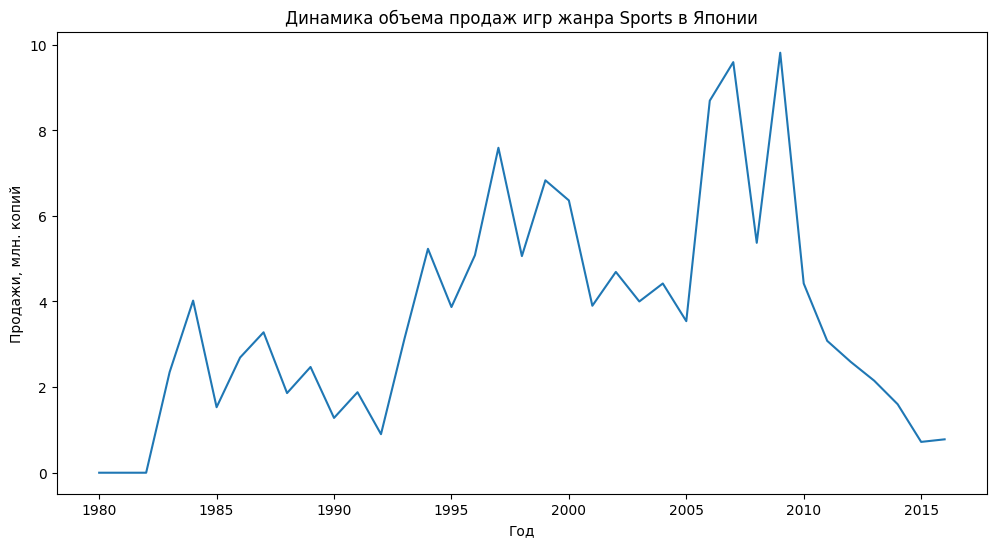

In [6]:
data = df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data)
ax.set_title('Динамика объема продаж игр жанра Sports в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн. копий')

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

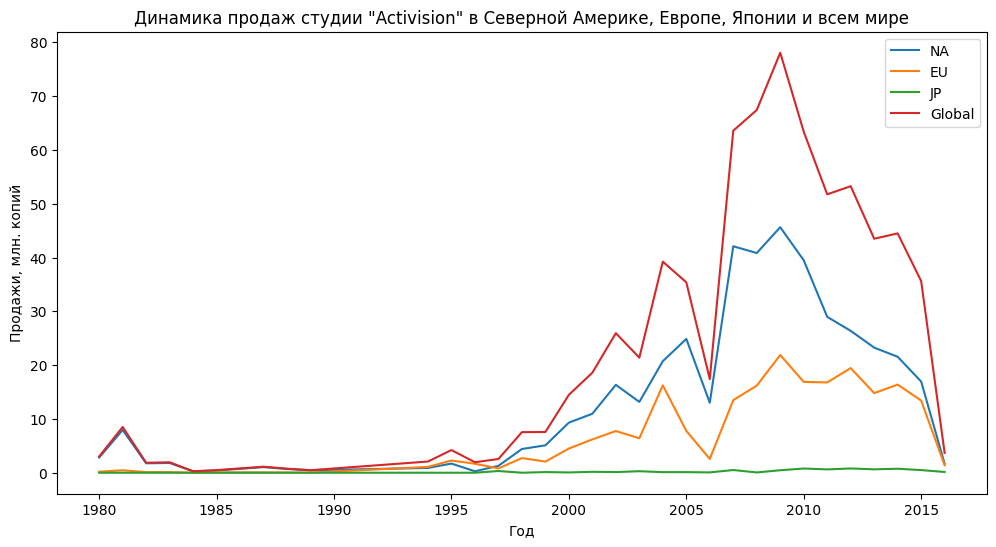

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

data_NA = df[df['Publisher']=='Activision'].groupby('Year')['NA_Sales'].sum()
data_EU = df[df['Publisher']=='Activision'].groupby('Year')['EU_Sales'].sum()
data_JP = df[df['Publisher']=='Activision'].groupby('Year')['JP_Sales'].sum()
data_global = df[df['Publisher']=='Activision'].groupby('Year')['Global_Sales'].sum()

ax.plot(data_NA, label='NA')
ax.plot(data_EU, label='EU')
ax.plot(data_JP, label='JP')
ax.plot(data_global, label='Global')

ax.legend()
ax.set_title('Динамика продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн. копий')

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

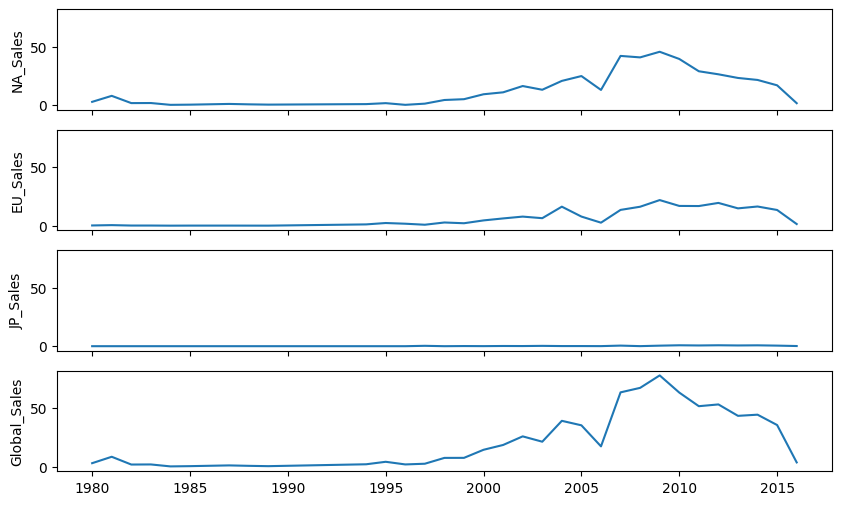

In [8]:
fig, axs = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(10, 6))

for i, sales_col in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']):
  data = df[df['Publisher'] == 'Activision'].groupby('Year')[sales_col].sum()
  ax = axs[i]
  ax.plot(data)
  ax.set_ylabel(sales_col) # в целом можно словарь сделать, {название столбца: какая нужна подпись к нему}, но думаю пока не критично

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)
Axes(0.547727,0.11;0.352273x0.35)


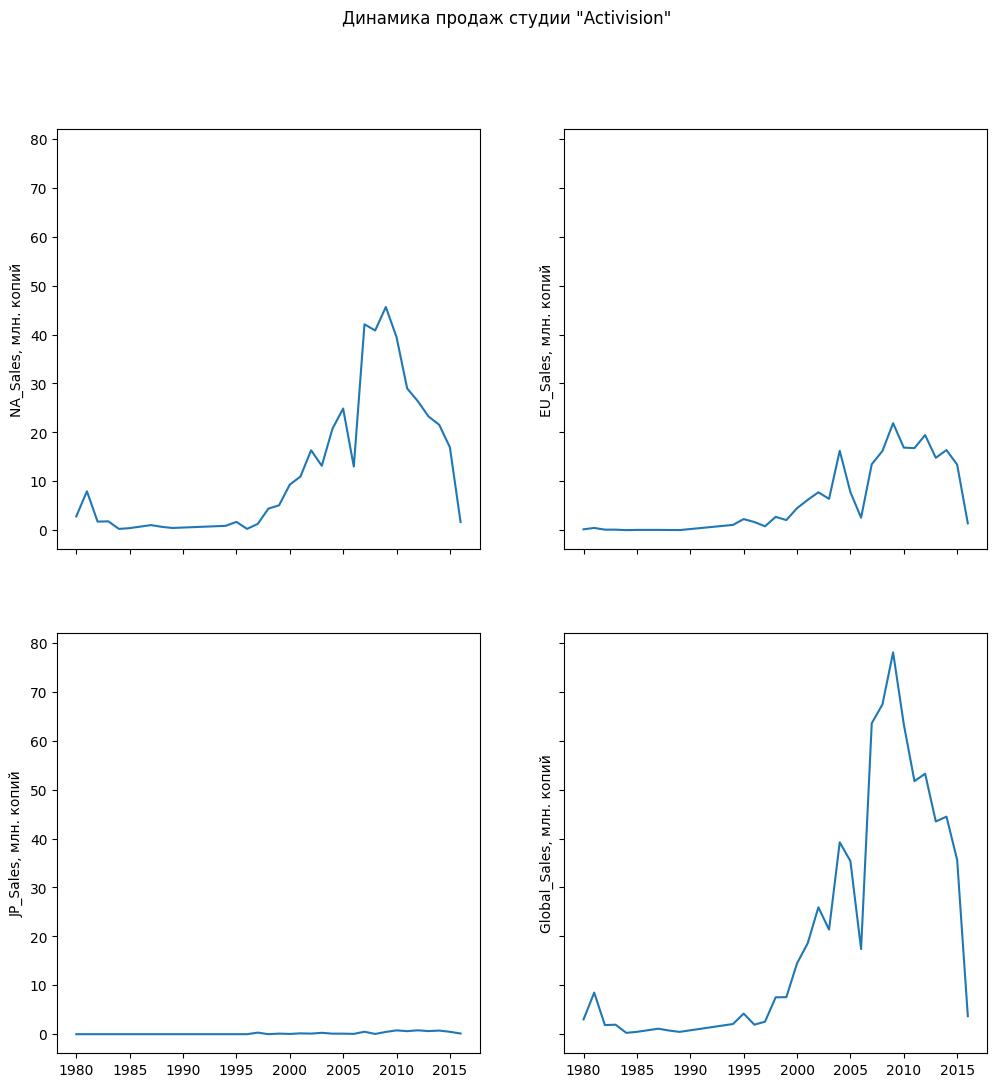

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 12))

x = 0
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
for i in range(2):
  for j in range(2):
    data = df[df['Publisher'] == 'Activision'].groupby('Year')[sales_cols[x]].sum()
    ax = axs[i][j]
    print(ax)
    ax.plot(data)
    ax.set_ylabel(sales_cols[x] + ', млн. копий')
    x += 1

fig.suptitle('Динамика продаж студии "Activision"')
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

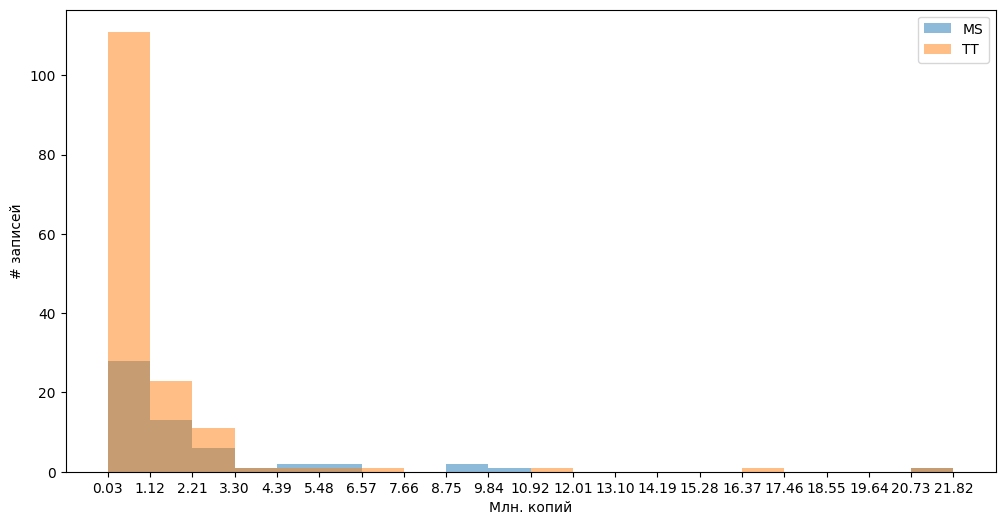

In [12]:
data_ms = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
data_tt = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']
# и все-таки, что лучше считать "распределением мировых продаж"? например, в данном графике я привожу, как я понимаю,
# какое кол-во записей в датафреме попадает в определенное значение 'Global Sales',
# но могу еще например сгруппировать по имени игры и суммировать продажи и приводить, какое кол-во попадает в какой-то объем продаж за все время в принципе...
# а если группировать по году - то вообще другой график будет, это получается он выведет какое кол-во годов в какой объем продаж попадают?

fig, ax = plt.subplots(figsize=(12, 6))

_, bins, _ = ax.hist(data_ms, label='MS', alpha=0.5, bins=20)
ax.hist(data_tt, label='TT', alpha=0.5, bins=bins)

ax.set_xlabel('Млн. копий')
ax.set_ylabel('# записей')
ax.set_xticks(bins)
ax.legend()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

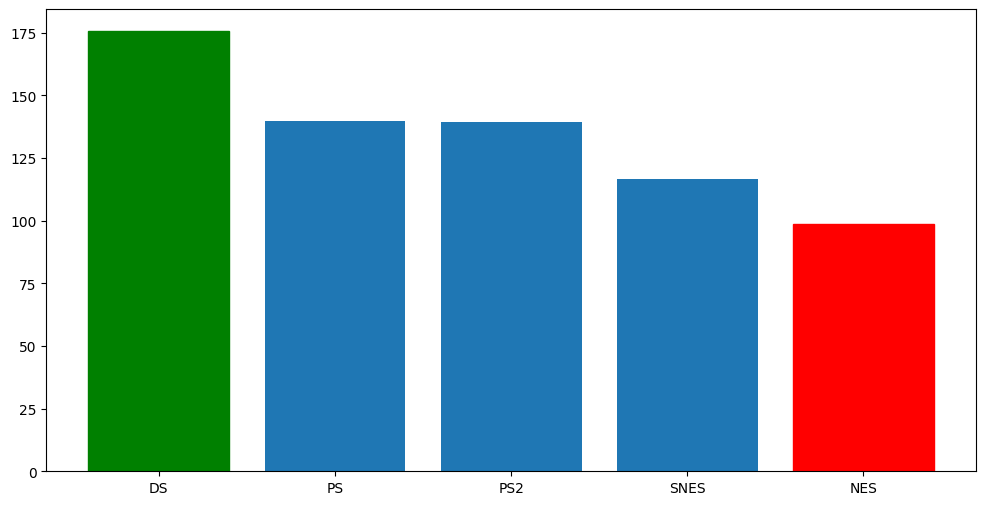

In [29]:
data = df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).head(5).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
patches = ax.bar(data['Platform'], data['JP_Sales'])

patches.patches[0].set_color('green')
patches.patches[4].set_color('red')

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

<ipython-input-66-3f7788339bb1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # для веселья


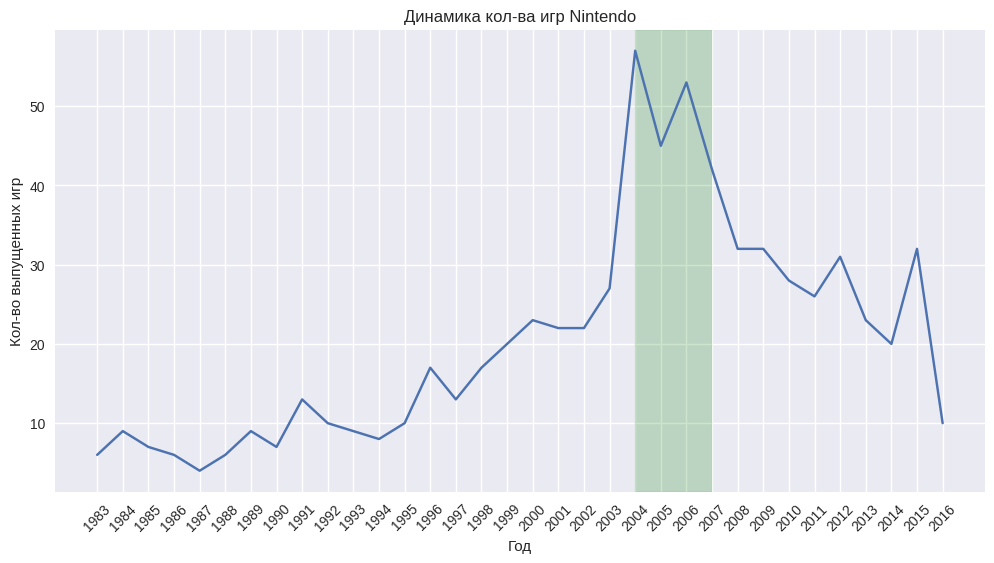

In [66]:
plt.style.use('seaborn') # для веселья

data = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Name'].count().reset_index()
years_green = data[data['Name'] > 35]['Year'] # тут удобно, что такой промежуток один, но думаю с обратной ситуацией тоже можно справиться (чат гпт показал как можно сгруппировать промежутки)

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data['Year'], data['Name'])
ax.axvspan(xmin=years_green.min(), xmax=years_green.max(), color='green', alpha=0.2)
ax.set_title('Динамика кол-ва игр Nintendo')
ax.set_ylabel('Кол-во выпущенных игр')
ax.set_xlabel('Год')
ax.set_xticks(list(range(data['Year'].astype(int).min(), data['Year'].astype(int).max()+ 1, 1))) # хотела каждый год на графике показать
# (действительно ли нужно собирать range годов, если я хочу их все показать на графике просто с шагом 1?)
ax.set_xticklabels(ax.get_xticks(), rotation=45) # нормальное решение для поврота подписей? нашла в интернете
plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

Text(0.5, 0.91, 'Зависимость общемировых продаж от продаж в Северной Америке')

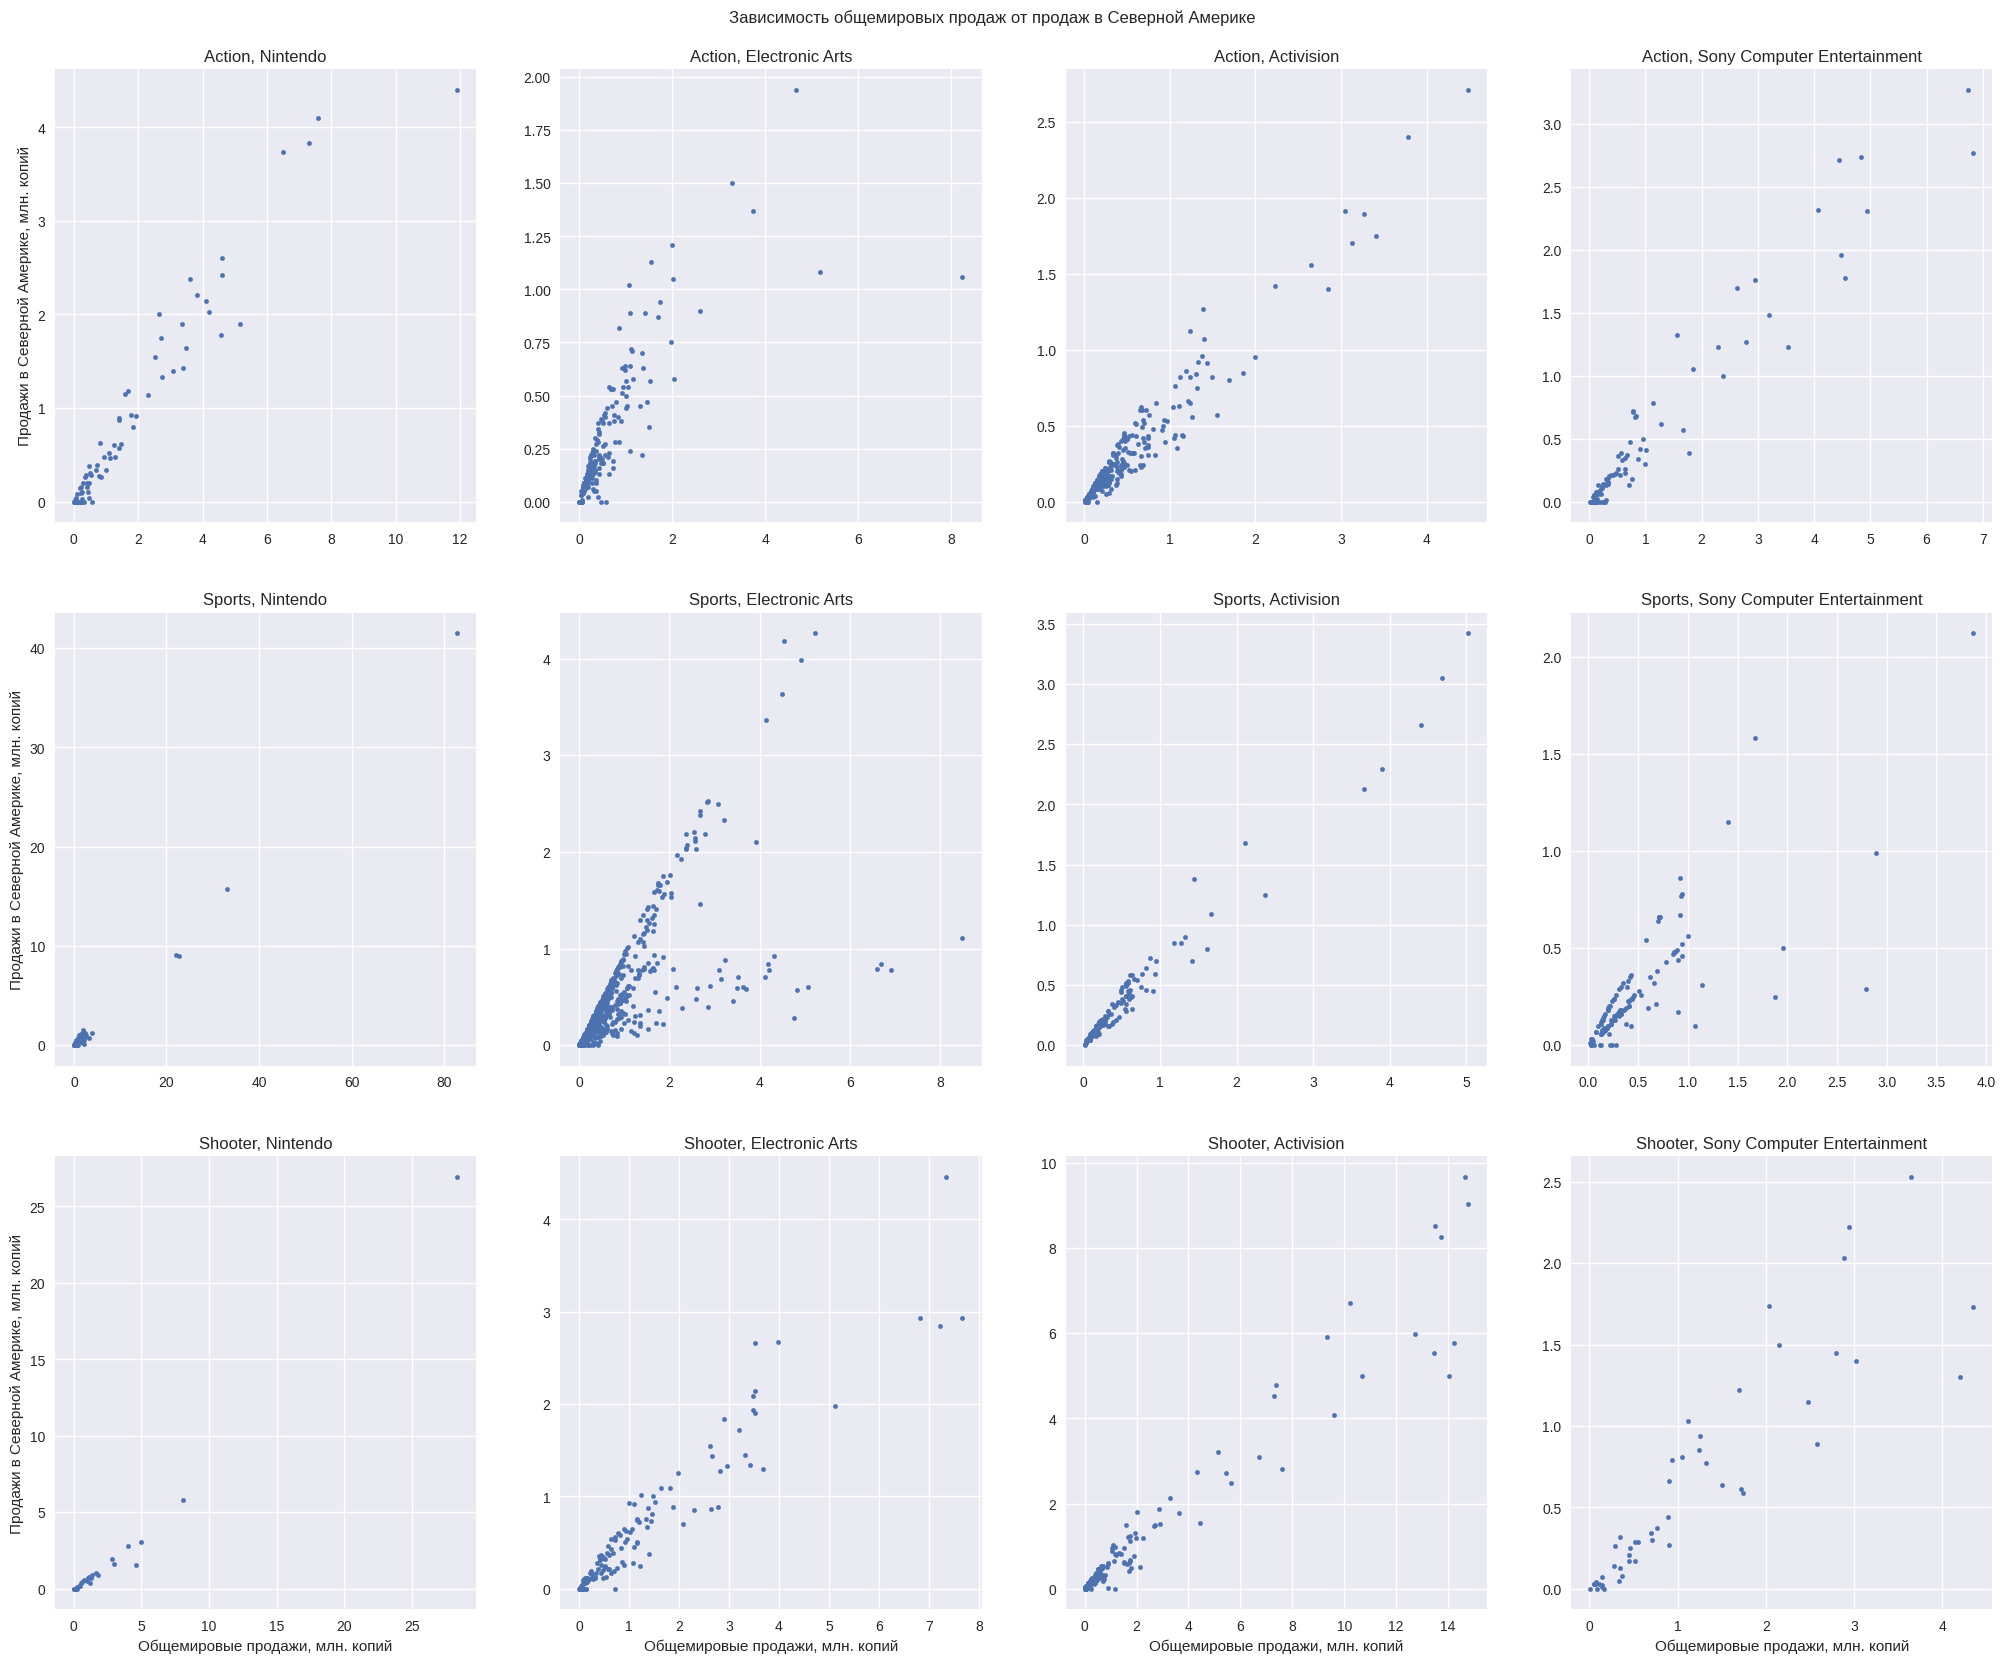

In [107]:
genres = list(df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(3).reset_index()['Genre'])
publishers = list(df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(4).reset_index()['Publisher'])

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(25, 20)) # можно использовать sharex и sharey, так будет явно нагляднее, но графики будут мельчить(((

for i, i_pub in enumerate(publishers):
  for j, j_genre in enumerate(genres):
    data = df[(df['Genre'] == j_genre) & (df['Publisher'] == i_pub)][['NA_Sales', 'Global_Sales']]
    ax = axs[j][i]
    ax.scatter(data['Global_Sales'], data['NA_Sales'], s=10)
    ax.set_title(j_genre + ', ' + i_pub)
    if i == 0:
      ax.set_ylabel('Продажи в Северной Америке, млн. копий')
    if j == 2:
      ax.set_xlabel('Общемировые продажи, млн. копий')

fig.suptitle('Зависимость общемировых продаж от продаж в Северной Америке', y=0.91)